In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from magnetofft import *

plot complete 2025_06_05_10_30.


Text(0.5, 1.0, 'FFT Amplitude of 2025_06_05_10_30 (lunchbreak)')

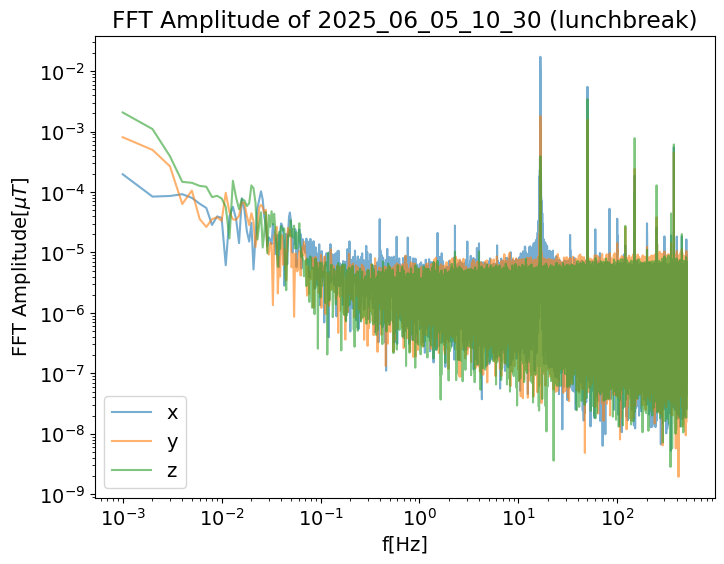

In [5]:
samplename = '2025_06_05_10_30 (lunchbreak)'
fs = 1000.
fig,ax = plot_sample_ps('/home/gw-group/20250605_Bedretto/mag_2025_06_05_10_30.csv',fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)

plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_30.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_30.csv.


Text(0.5, 1.0, 'LSD of 2025_06_05_10_30 (lunchbreak)')

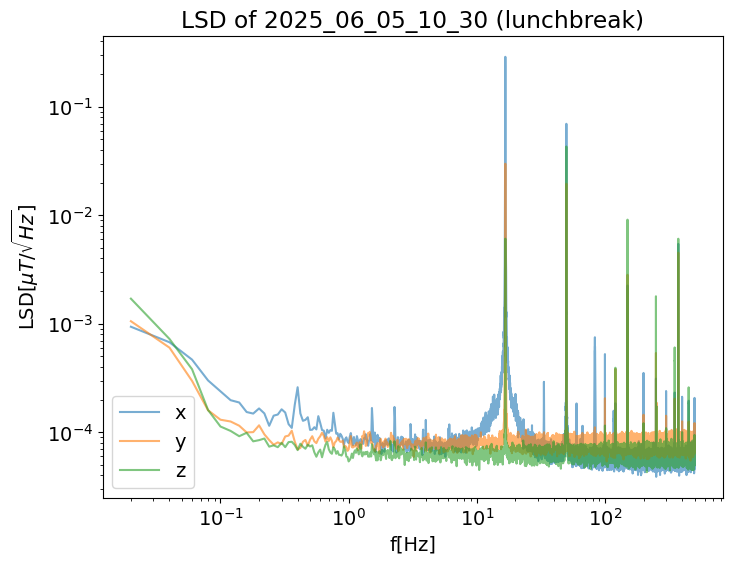

In [6]:
samplename = '2025_06_05_10_30 (lunchbreak)'
fs = 1000.
fig,ax = plot_sample_psd('/home/gw-group/20250605_Bedretto/mag_2025_06_05_10_30.csv',fs=fs)
ax.legend(loc='lower left')
ax.set_title('LSD of '+ samplename)

In [3]:
directory = '/home/gw-group/20250605_Bedretto/'
dset = load_csv(directory+'mag_2025_06_05_10_30.csv')
xs = dset['x']
fs = 1000.

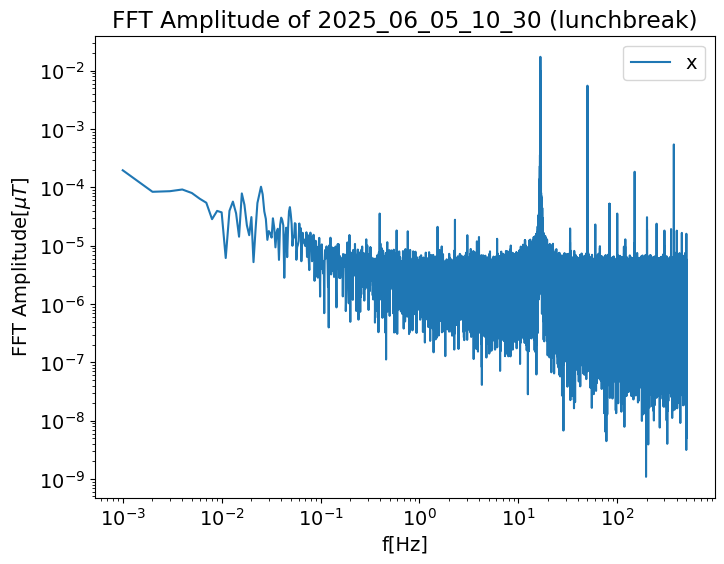

In [4]:
plt.rcParams.update({'font.size': 14})

f,ps = compute_ps(xs,fs)
fig,ax = plt.subplots(figsize=(8,6))
ax.loglog(f,np.sqrt(ps),label = 'x')
ax.set_xlabel('f[Hz]')
ax.set_ylabel('FFT Amplitude[$\mu T$]')
ax.legend(loc='upper right')
ax.set_title('FFT Amplitude of 2025_06_05_10_30 (lunchbreak)')
fig.savefig('FFT_2025_06_05_10_30.png',dpi=200)

/home/gw-group/gdzhao/.env/lib/python3.11/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


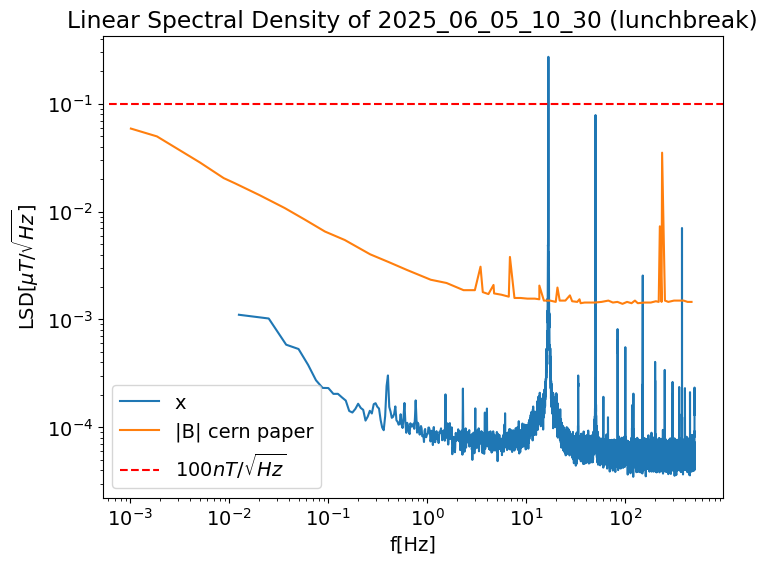

In [15]:
Lbin= 80000
overlap = 0.50
f,psd_avg = compute_averaged_psd(xs,fs,Lbin,overlap)

fig,ax = plt.subplots(figsize=(8,6))
ax.loglog(f,np.sqrt(psd_avg),label = 'x')
psd_cern = np.genfromtxt('pixelized_PSD_bamp.csv',delimiter = ',')
plt.plot(psd_cern[:,0],psd_cern[:,1], label = '|B| cern paper')
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.set_xlabel('f[Hz]')
ax.set_ylabel('LSD[$\mu T/ \sqrt{Hz}$]')
ax.legend(loc='lower left')
ax.set_title('Linear Spectral Density of 2025_06_05_10_30 (lunchbreak)')

fig.savefig('LSD_2025_06_05_10_30.png',dpi=200)

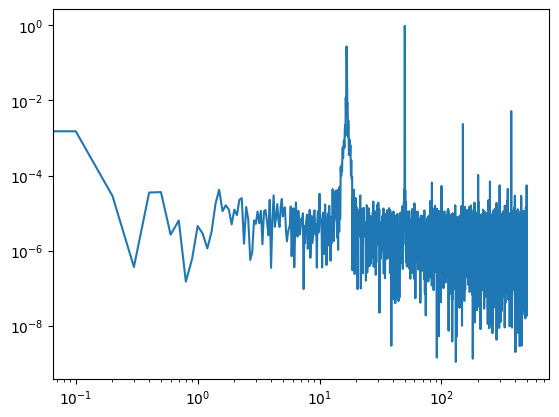

In [5]:
N = 10000
xsubmean = xs - np.mean(xs)
xs_sliced = xsubmean[:N]

ws = np.hamming(N)
ws1 = np.sum(ws)
ws2 = np.sum(ws**2)

xw = xs_sliced*ws
freq = np.fft.rfftfreq(N,1./fs)
xk = np.fft.rfft(xw)

enbw = fs * ws2 / (ws1**2)
ps = np.abs(xk)**2
ps[1:-1] *= 2
ps /= ws1

plt.loglog(freq,ps)

0.06814374195645459


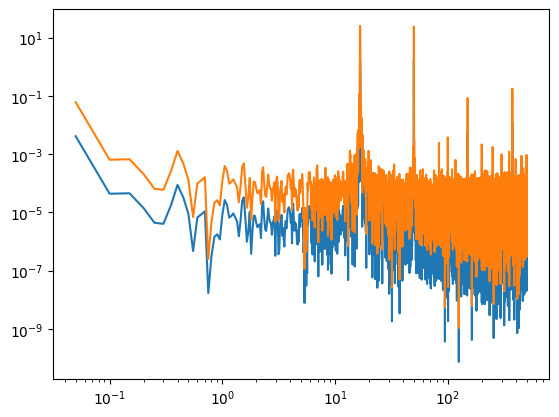

In [6]:
N = 20000
xsubmean = xs - np.mean(xs)
xs_sliced = xsubmean[:N]

ws = np.hamming(N)
ws1 = np.sum(ws)
ws2 = np.sum(ws**2)

xw = xs_sliced*ws
freq = np.fft.rfftfreq(N,1./fs)
xk = np.fft.rfft(xw)

enbw = fs * ws2 / (ws1**2)
ps = np.abs(xk)**2
ps[1:-1] *= 2
ps /= ws1

ps = ps[1:]
freq = freq[1:]

psd = ps / enbw

plt.loglog(freq,ps)
plt.loglog(freq,psd)
print(enbw)

0.2726044021470291


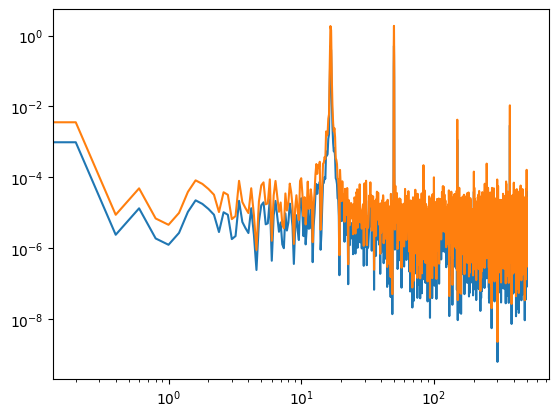

In [7]:
N = 5000
xsubmean = xs - np.mean(xs)
xs_sliced = xsubmean[:N]

ws = np.hamming(N)
ws1 = np.sum(ws)
ws2 = np.sum(ws**2)

xw = xs_sliced*ws
freq = np.fft.rfftfreq(N,1./fs)
xk = np.fft.rfft(xw)

enbw = fs * ws2 / (ws1**2)
ps = np.abs(xk)**2
ps[1:-1] *= 2
ps /= ws1

psd = ps / enbw

plt.loglog(freq,ps)
plt.loglog(freq,psd)
print(enbw)

In [8]:
def compute_psd(chs,fs):
    # remove DC
    chs = chs - np.mean(chs)
    N = len(chs)
    
    # add window
    ws = np.hamming(N)
    ws1 = np.sum(ws)
    ws2 = np.sum(ws**2)

    # rfft
    f = np.fft.rfftfreq(N,1./fs)
    ak = np.fft.rfft(chs*ws)

    # normalize into psd
    psd = np.abs(ak)**2/fs/ws2
    psd[1:-1] *= 2
    return f,psd

def compute_ps(chs,fs):
    # remove DC
    chs = chs - np.mean(chs)
    N = len(chs)
    
    # add window
    ws = np.hamming(N)
    ws1 = np.sum(ws)
    ws2 = np.sum(ws**2)

    # rfft
    f = np.fft.rfftfreq(N,1./fs)
    ak = np.fft.rfft(chs*ws)

    # normalize into psd
    ps = np.abs(ak)**2/ws1**2
    ps[1:-1] *= 2
    return f,ps
    

In [83]:
f,ps1 = compute_ps(xs[0:10000],fs)
f,ps2 = compute_ps(xs[5000:15000],fs)
f,ps3 = compute_ps(xs[10000:20000],fs)
f,ps4 = compute_ps(xs[15000:25000],fs)
f,ps5 = compute_ps(xs[20000:30000],fs)
f,ps6 = compute_ps(xs[25000:35000],fs)

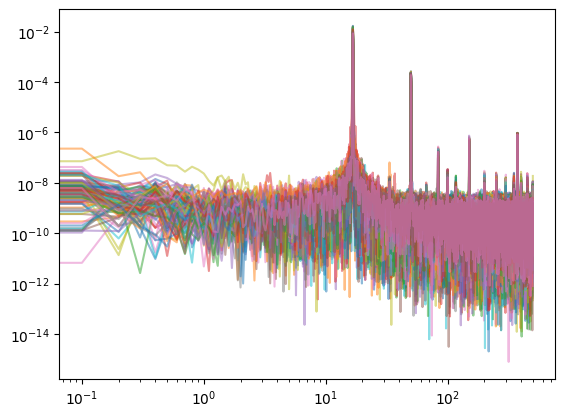

In [92]:
Nhop = 10000
Lbin = 20000
for n in range(0,(len(xs)-Lbin)//Nhop):
    binmin = n*Nhop
    binmax = (n+1)*Nhop
    f,ps = compute_ps(xs[binmin:binmax],fs)
    plt.loglog(f,ps,alpha=0.5)

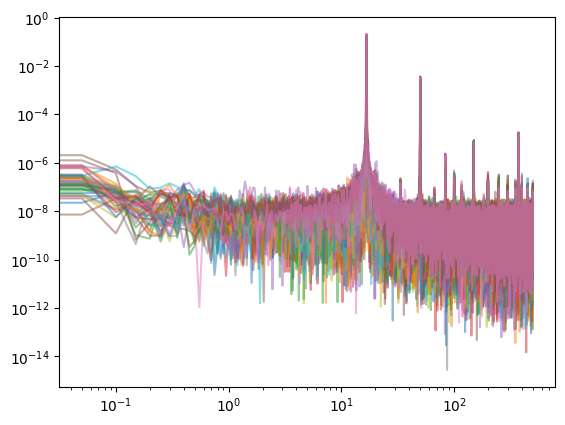

In [99]:
Nhop = 20000
Lbin = 40000
for n in range(0,(len(xs)-Lbin)//Nhop):
    binmin = n*Nhop
    binmax = (n+1)*Nhop
    f,psd = compute_psd(xs[binmin:binmax],fs)
    plt.loglog(f,psd,alpha=0.5)

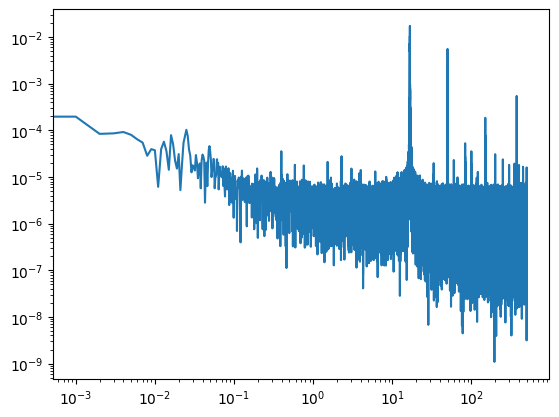

In [11]:
f,ps = compute_ps(xs,fs)
plt.loglog(f,np.sqrt(ps))

In [78]:
def plot_psd_N(N):
    xsubmean = xs - np.mean(xs)
    xs_sliced = xsubmean[:N]
    
    ws = np.hamming(N)
    ws1 = np.sum(ws)
    ws2 = np.sum(ws**2)
    
    xw = xs_sliced*ws
    freq = np.fft.rfftfreq(N,1./fs)
    xk = np.fft.rfft(xw)
    
    enbw = fs * ws2 / (ws1**2)
    ps = np.abs(xk)**2
    ps[1:-1] *= 2
    ps /= ws1
    
    psd = ps / enbw
    # plt.loglog(freq,ps)
    plt.loglog(freq,psd,label=f'{N}',alpha=0.5)

def plot_ps_N(N):
    xsubmean = xs - np.mean(xs)
    xs_sliced = xsubmean[:N]
    
    ws = np.hamming(N)
    ws1 = np.sum(ws)
    ws2 = np.sum(ws**2)
    
    xw = xs_sliced*ws
    freq = np.fft.rfftfreq(N,1.0/fs)
    xk = np.fft.rfft(xw)
    
    enbw = fs * ws2 / (ws1**2)
    ps = np.abs(xk)**2
    ps[1:-1] *= 2
    ps /= ws1
    
    psd = ps / enbw
    # plt.loglog(freq,ps)
    plt.loglog(freq,ps,label=f'{N}',alpha=0.5)

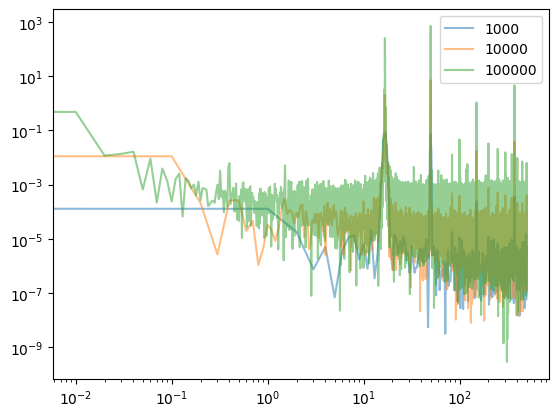

In [79]:
plot_psd_N(1000)
plot_psd_N(10000)
plot_psd_N(100000)
plt.legend()

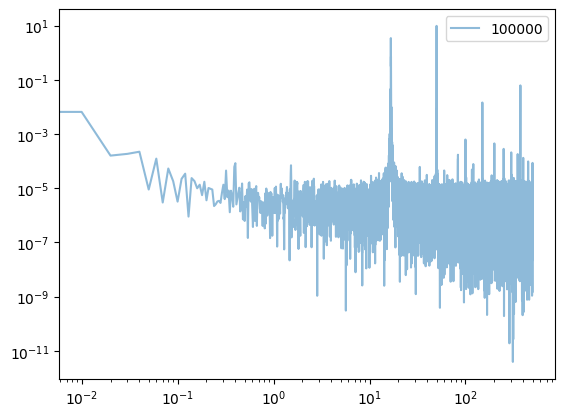

In [81]:
# plot_ps_N(1000)
# plot_ps_N(10000)
plot_ps_N(100000)
plt.legend()